In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

i=0, hex_rep='#1f77b4', i=1, hex_rep='#aec7e8', i=2, hex_rep='#ff7f0e', i=3, hex_rep='#ffbb78', i=4, hex_rep='#2ca02c', i=5, hex_rep='#98df8a', i=6, hex_rep='#d62728', i=7, hex_rep='#ff9896', i=8, hex_rep='#9467bd', i=9, hex_rep='#c5b0d5', 


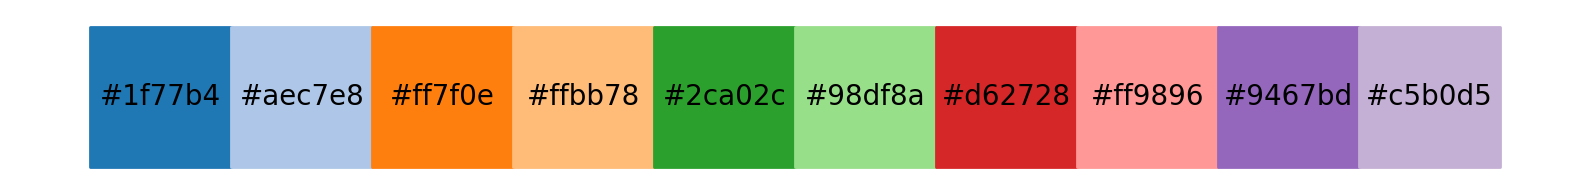

In [2]:
# The folder within the respective valuation to put the plots
PLOT_DIR = 'plots'
if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)

# Default plot config
FIG_SIZE_INCHES = (6, 2.5)
sns.set_style('white')
sns.set_palette('tab20')

# The primary modes to plot
MAIN_MODES = ['HS', 'ES', 'ES+']
ALL_MODES = ['H', 'HS', 'E', 'ES', 'ES+']

DURATIONS_TO_LABELS = {
    'memory_allocation_duration': 'Start EIF',
    'enclave_boot_duration': 'Boot',
    'runner_config_duration': 'Runner init',
    'checkout_duration': 'Checkout',
    'configure_duration': 'Configure',
    'make_duration': 'Build',
    'make_check_duration': 'Test',
    'build_duration': 'Build',
    'e2e_duration': 'Overall E2E',
}

# And print a palette with the first 10 colours (with the hex values as overlay)
fig = plt.figure(figsize=(10, 1))
for i, color in enumerate(sns.color_palette()[:10]):
    plt.fill_between([i, i + 1], 0, 1, color=color)
    # plt.text(i + 0.5, 0.5, f"{i}", ha='center', va='center', color='black')
    hex_rep = '#%02x%02x%02x' % tuple(int(255 * x) for x in color)
    print(f"{i=}, {hex_rep=}", end=', ')
    plt.text(i + 0.5, 0.5, f"{hex_rep}", ha='center', va='center', color='black')
    plt.axis('off')
print()

# Map durations to colours
DURATION_TO_COLOR = {
    # individual steps
    'memory_allocation_duration': sns.color_palette()[0],
    'enclave_boot_duration': sns.color_palette()[1],
    'runner_config_duration': sns.color_palette()[2],
    'checkout_duration': sns.color_palette()[3],
    'configure_duration': sns.color_palette()[5],
    'make_duration': sns.color_palette()[4],
    'make_check_duration': sns.color_palette()[7],

    # combined steps
    'build_duration': sns.color_palette()[4],
    'e2e_duration': sns.color_palette()[8],
}


def show_and_save_figure(ff, name):
    plt.show()
    ff.savefig(f"{PLOT_DIR}/{name}.png", bbox_inches='tight', pad_inches=0)
    ff.savefig(f"{PLOT_DIR}/{name}.pdf", bbox_inches='tight', pad_inches=0)


In [3]:
# Read latest.csv
df = pd.read_csv('latest.csv')
df

,name,runner_start_mode,fake_attestation,big_job,use_real_runner,target,path,input_set,target_label,runner_start_mode_label,...,build_duration,configure_duration,make_duration,make_check_duration,e2e_duration,checkout_duration,memory_allocation_duration,enclave_boot_duration,runner_config_duration,runner_readiness_duration
0,project_clang_local_direct_1,local_direct,True,True,True,project_clang,scenario_full_big/evaluation_2025-04-10_21-57-21,big,Clang (18.1.3),H,...,2838.250335,48.945833,2789.304502,0.022101,2987.477469,139.017872,0.001,0.101,3.920,4.022
1,project_clang_local_sandbox_1,local_sandbox,True,True,True,project_clang,scenario_full_big/evaluation_2025-04-10_21-57-21,big,Clang (18.1.3),HS,...,3296.459195,48.606602,3247.852593,0.017392,3451.850806,144.383924,0.001,0.102,4.168,4.271
2,project_clang_enclave_direct_1,enclave_direct,False,True,True,project_clang,scenario_full_big/evaluation_2025-04-10_21-57-21,big,Clang (18.1.3),E,...,3289.382153,36.616296,3252.765857,0.017400,3512.700135,138.977199,70.894,3.107,3.752,77.753
3,project_clang_enclave_sandbox_1,enclave_sandbox,False,True,True,project_clang,scenario_full_big/evaluation_2025-04-10_21-57-21,big,Clang (18.1.3),ES,...,3839.994663,35.593799,3804.400864,0.017938,4037.323370,130.926450,46.519,9.117,4.173,59.809
4,project_clang_enclave_sandbox_plus_1,enclave_sandbox_plus,False,True,True,project_clang,scenario_full_big/evaluation_2025-04-10_21-57-21,big,Clang (18.1.3),ES+,...,4863.453921,114.555034,4748.898887,0.085490,5049.183198,116.039131,46.426,9.114,5.177,60.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,project_verifier_client_j8_local_direct_3,local_direct,True,False,True,project_verifier_client_j8,scenario_full/evaluation_2025-04-09_21-50-36,scalar,Verifier Client (j8),H,...,75.422774,4.241052,71.181722,0.019098,86.837318,0.619676,0.000,0.102,3.783,3.885
416,project_verifier_client_j8_local_sandbox_3,local_sandbox,True,False,True,project_verifier_client_j8,scenario_full/evaluation_2025-04-09_21-50-36,scalar,Verifier Client (j8),HS,...,74.441825,4.236686,70.205139,0.017145,87.176958,0.604205,0.001,0.101,3.974,4.076
417,project_verifier_client_j8_enclave_direct_3,enclave_direct,False,False,True,project_verifier_client_j8,scenario_full/evaluation_2025-04-09_21-50-36,scalar,Verifier Client (j8),E,...,76.102111,3.186353,72.915758,0.016914,133.858179,0.687559,43.367,3.105,4.112,50.584
418,project_verifier_client_j8_enclave_sandbox_3,enclave_sandbox,False,False,True,project_verifier_client_j8,scenario_full/evaluation_2025-04-09_21-50-36,scalar,Verifier Client (j8),ES,...,77.278356,4.127637,73.150719,0.015596,125.179887,0.691993,29.365,8.112,3.483,40.960


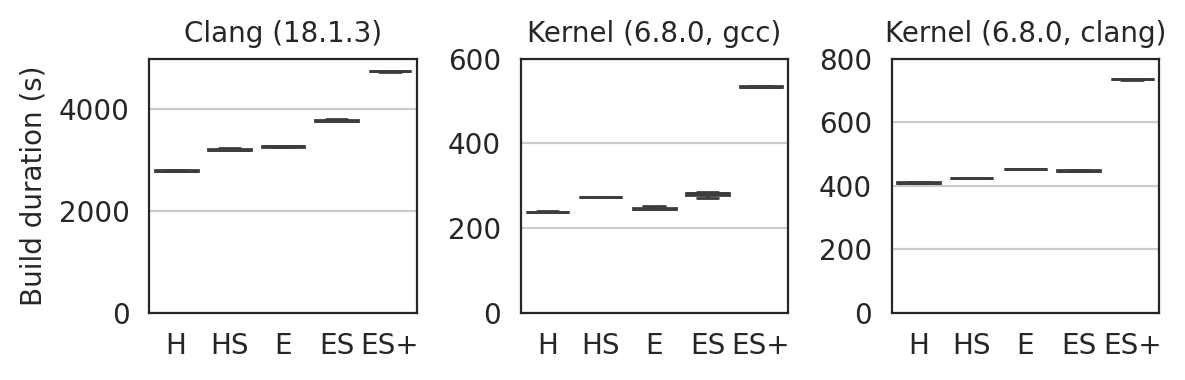

In [4]:
def plot_single_metric_box_plot(df, metric, modes=MAIN_MODES, fig_size=FIG_SIZE_INCHES, ylims=None):
    targets = list(df.target_label.unique())

    fig, axs = plt.subplots(ncols=len(targets), sharey=False)
    fig.set_size_inches(fig_size)

    for target, ax, idx in zip(targets, axs, range(len(axs))):
        df_target = df[(df['target_label'] == target) & (df['runner_start_mode_label'].isin(modes))].copy()
        # df_target.runner_start_mode_label = df_target.runner_start_mode_label.cat.remove_unused_categories()
        ax = sns.boxplot(
            data=df_target,
            x='runner_start_mode_label',
            y=metric,
            ax=ax,
            showfliers=True,
            color=DURATION_TO_COLOR[metric],
        )
        ax.set_title(target, size=10)
        ax.set_ylabel('Build duration (s)' if target == targets[0] else None)
        ax.set_xlabel(None)
        ax.grid(axis='y')

        if ylims:
            ax.set_ylim(ylims[idx])

    fig.tight_layout()
    return fig, axs


# fig, _ = plot_single_metric_box_plot(df=df[df.input_set == 'small'], metric='build_duration')
# show_and_save_figure(fig, 'box_build_duration_small')

fig, _ = plot_single_metric_box_plot(
    df=df[df.input_set == 'big'],
    metric='make_duration',
    modes=ALL_MODES,
    fig_size=(FIG_SIZE_INCHES[0], 0.8 * FIG_SIZE_INCHES[1]),
    ylims=[(0, 5000), (0, 600), (0, 800)],
)
show_and_save_figure(fig, 'box_build_duration_big')

# fig, _ = plot_single_metric_box_plot(df=df[df.input_set == 'new'], metric='build_duration')
# show_and_save_figure(fig, 'box_build_duration_new')


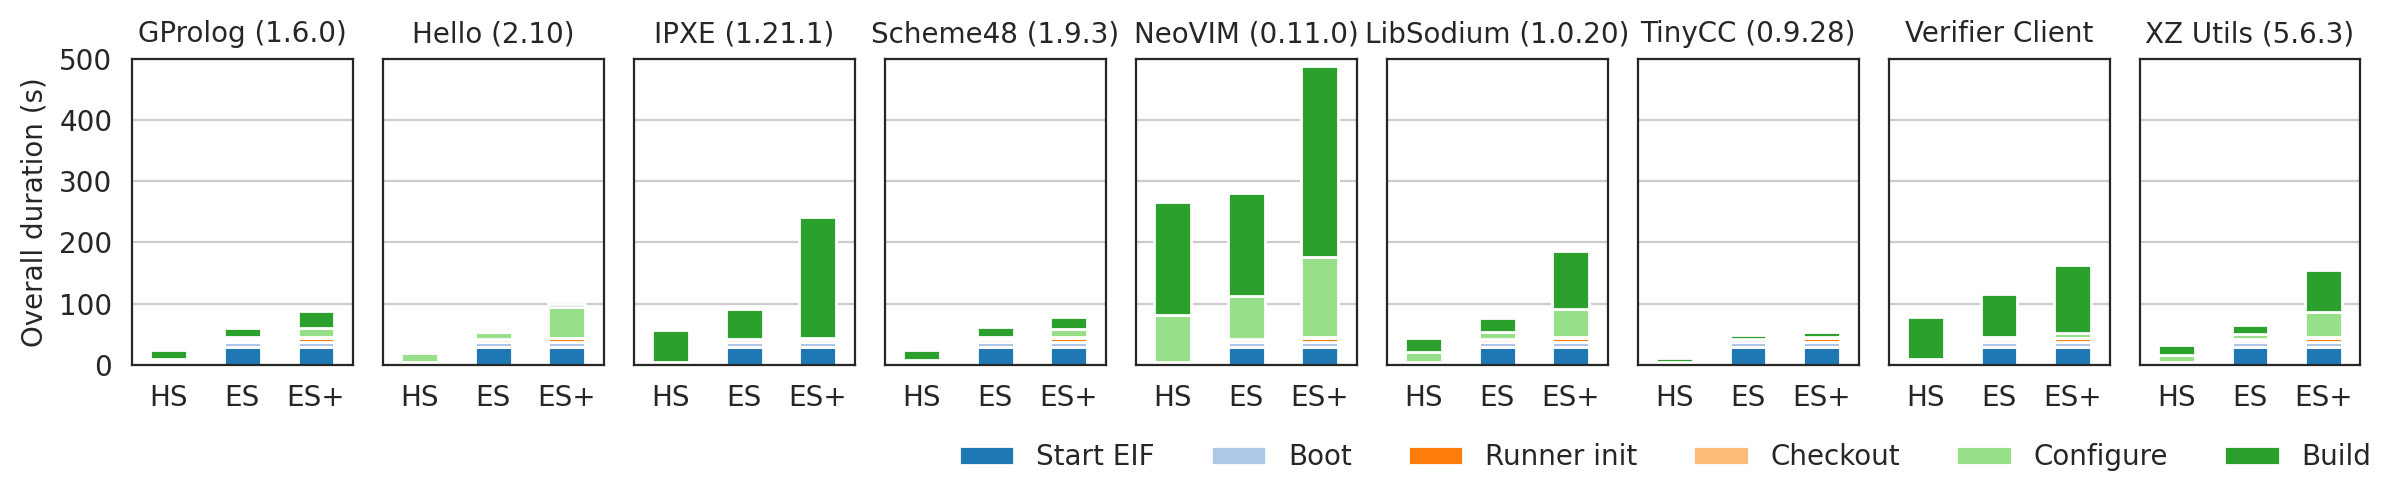

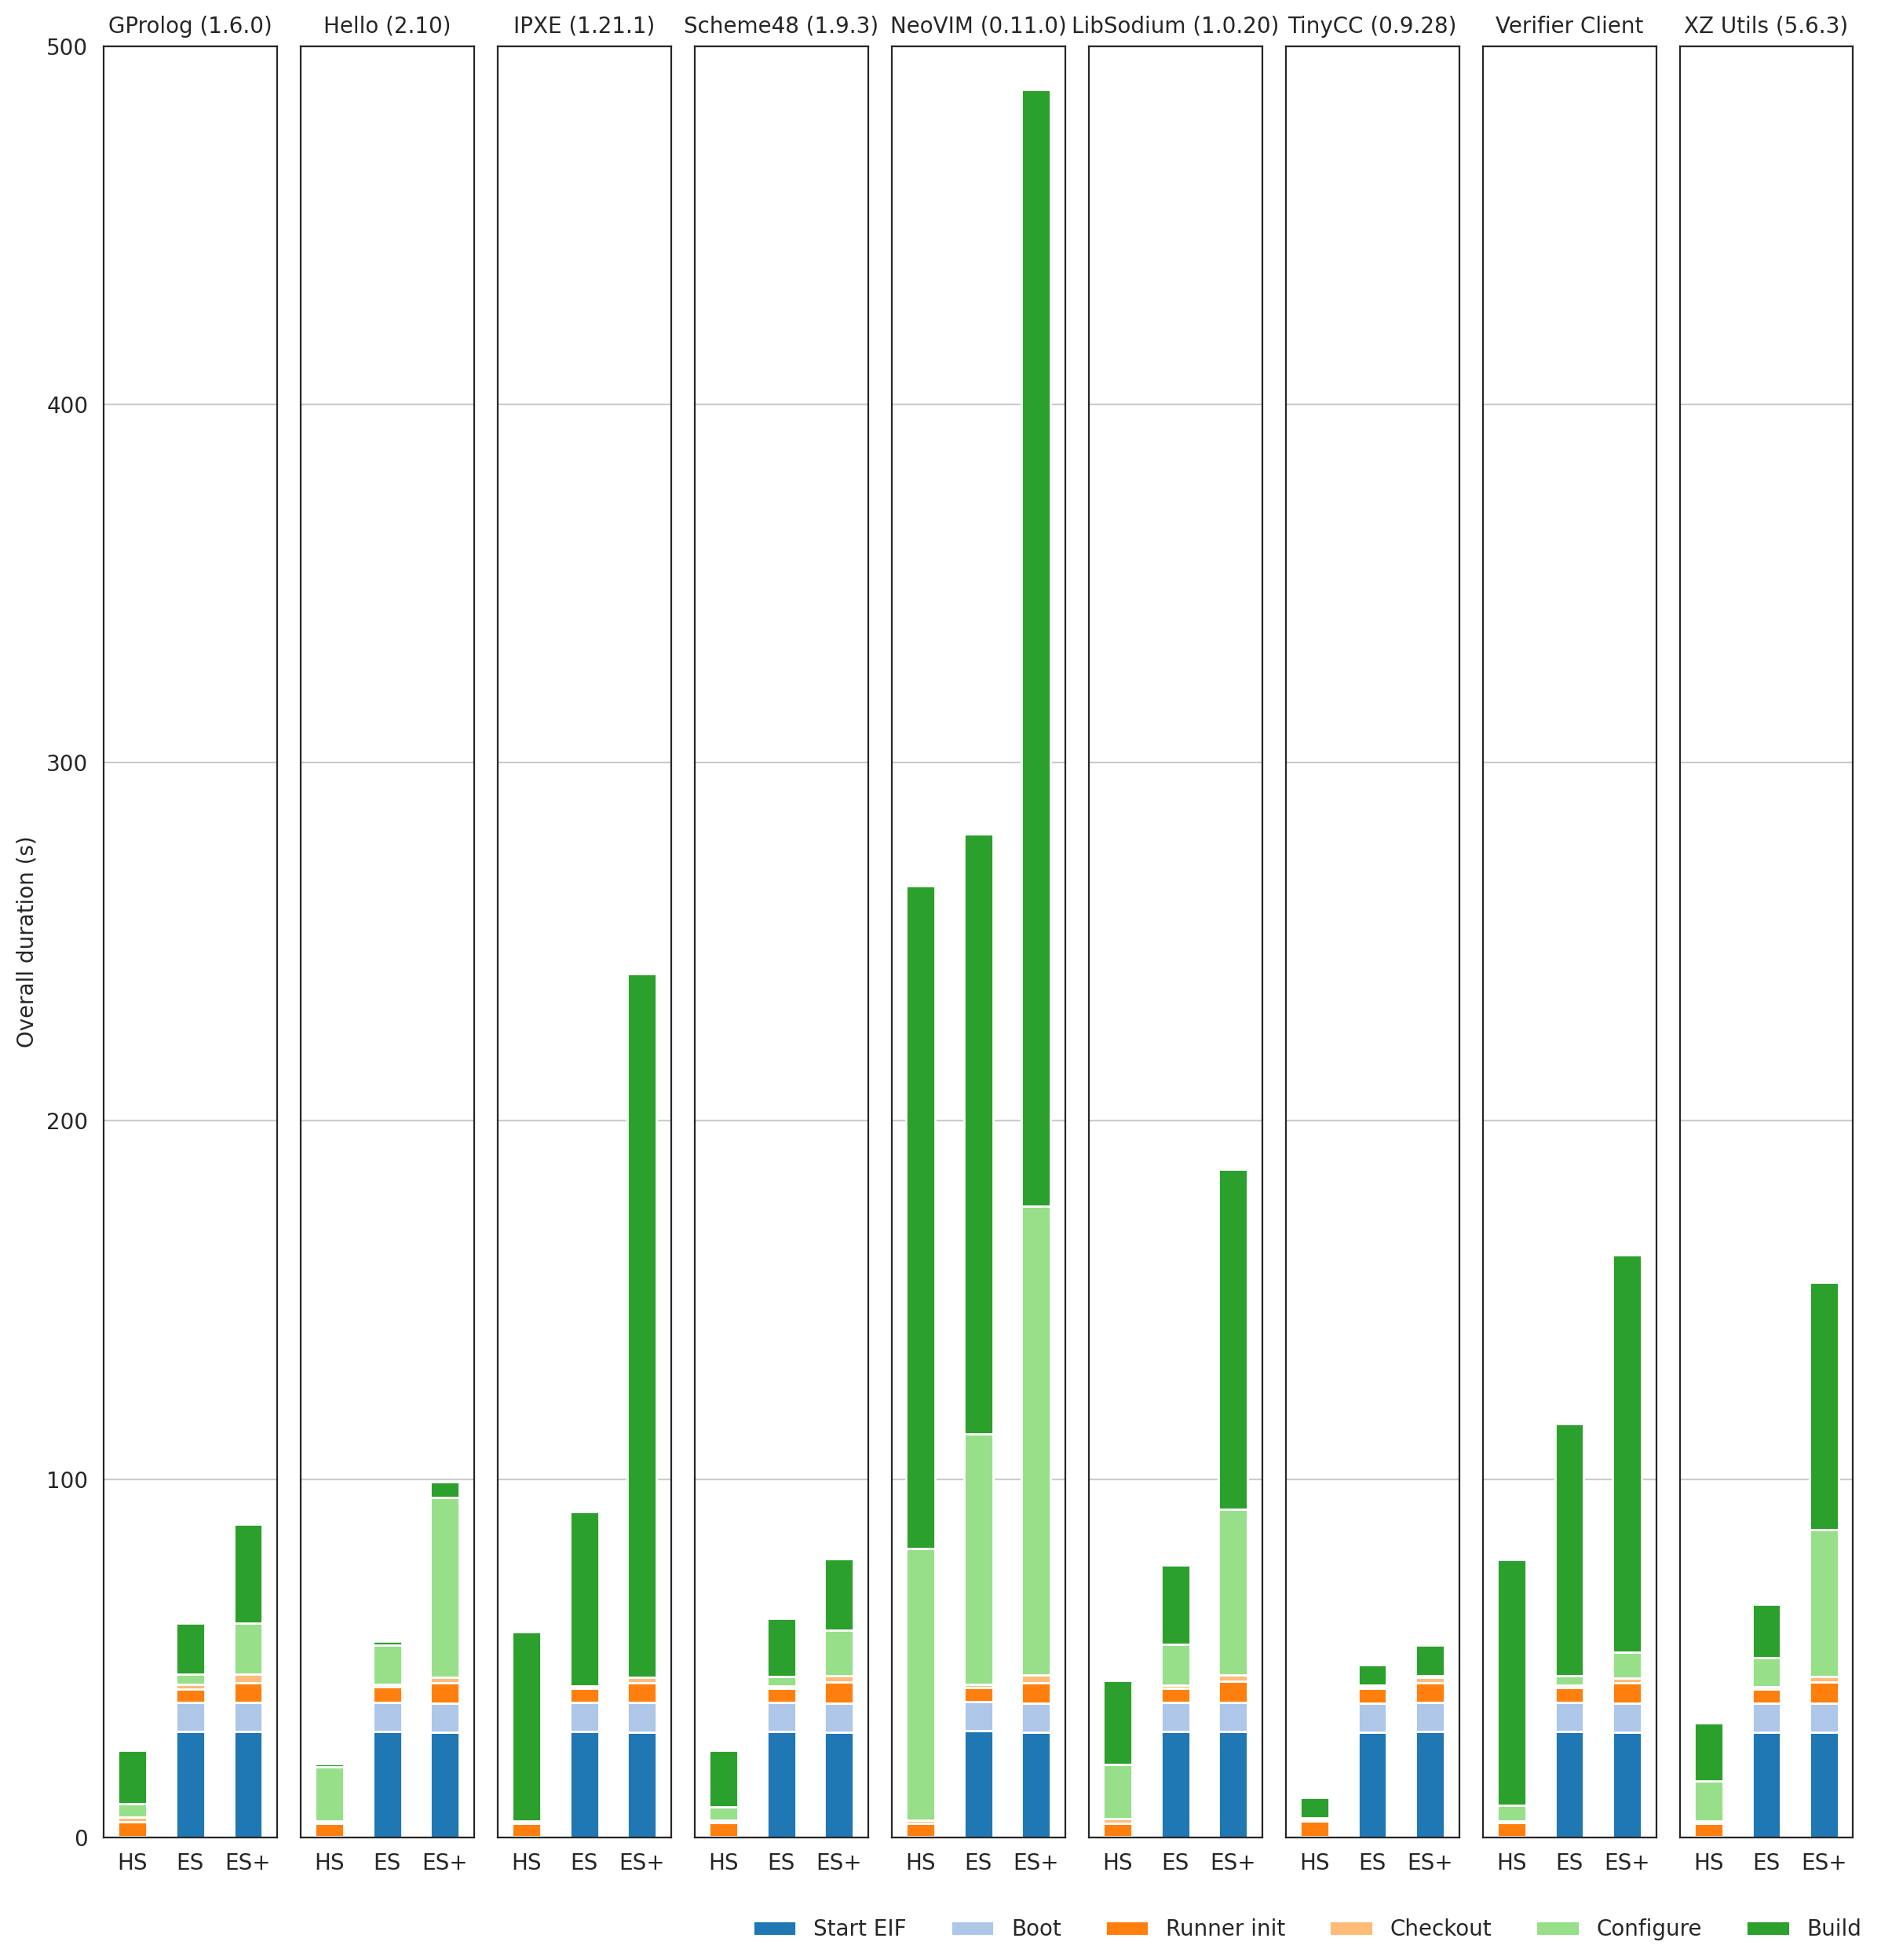

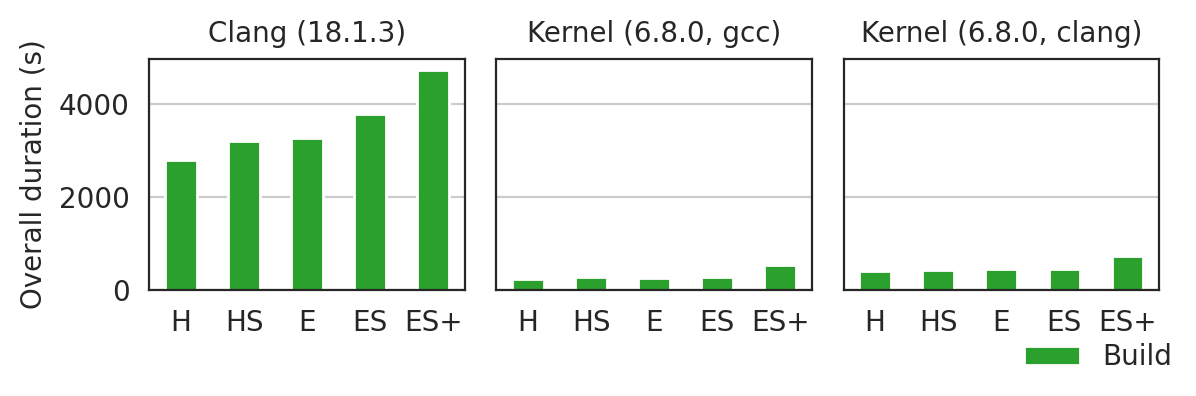

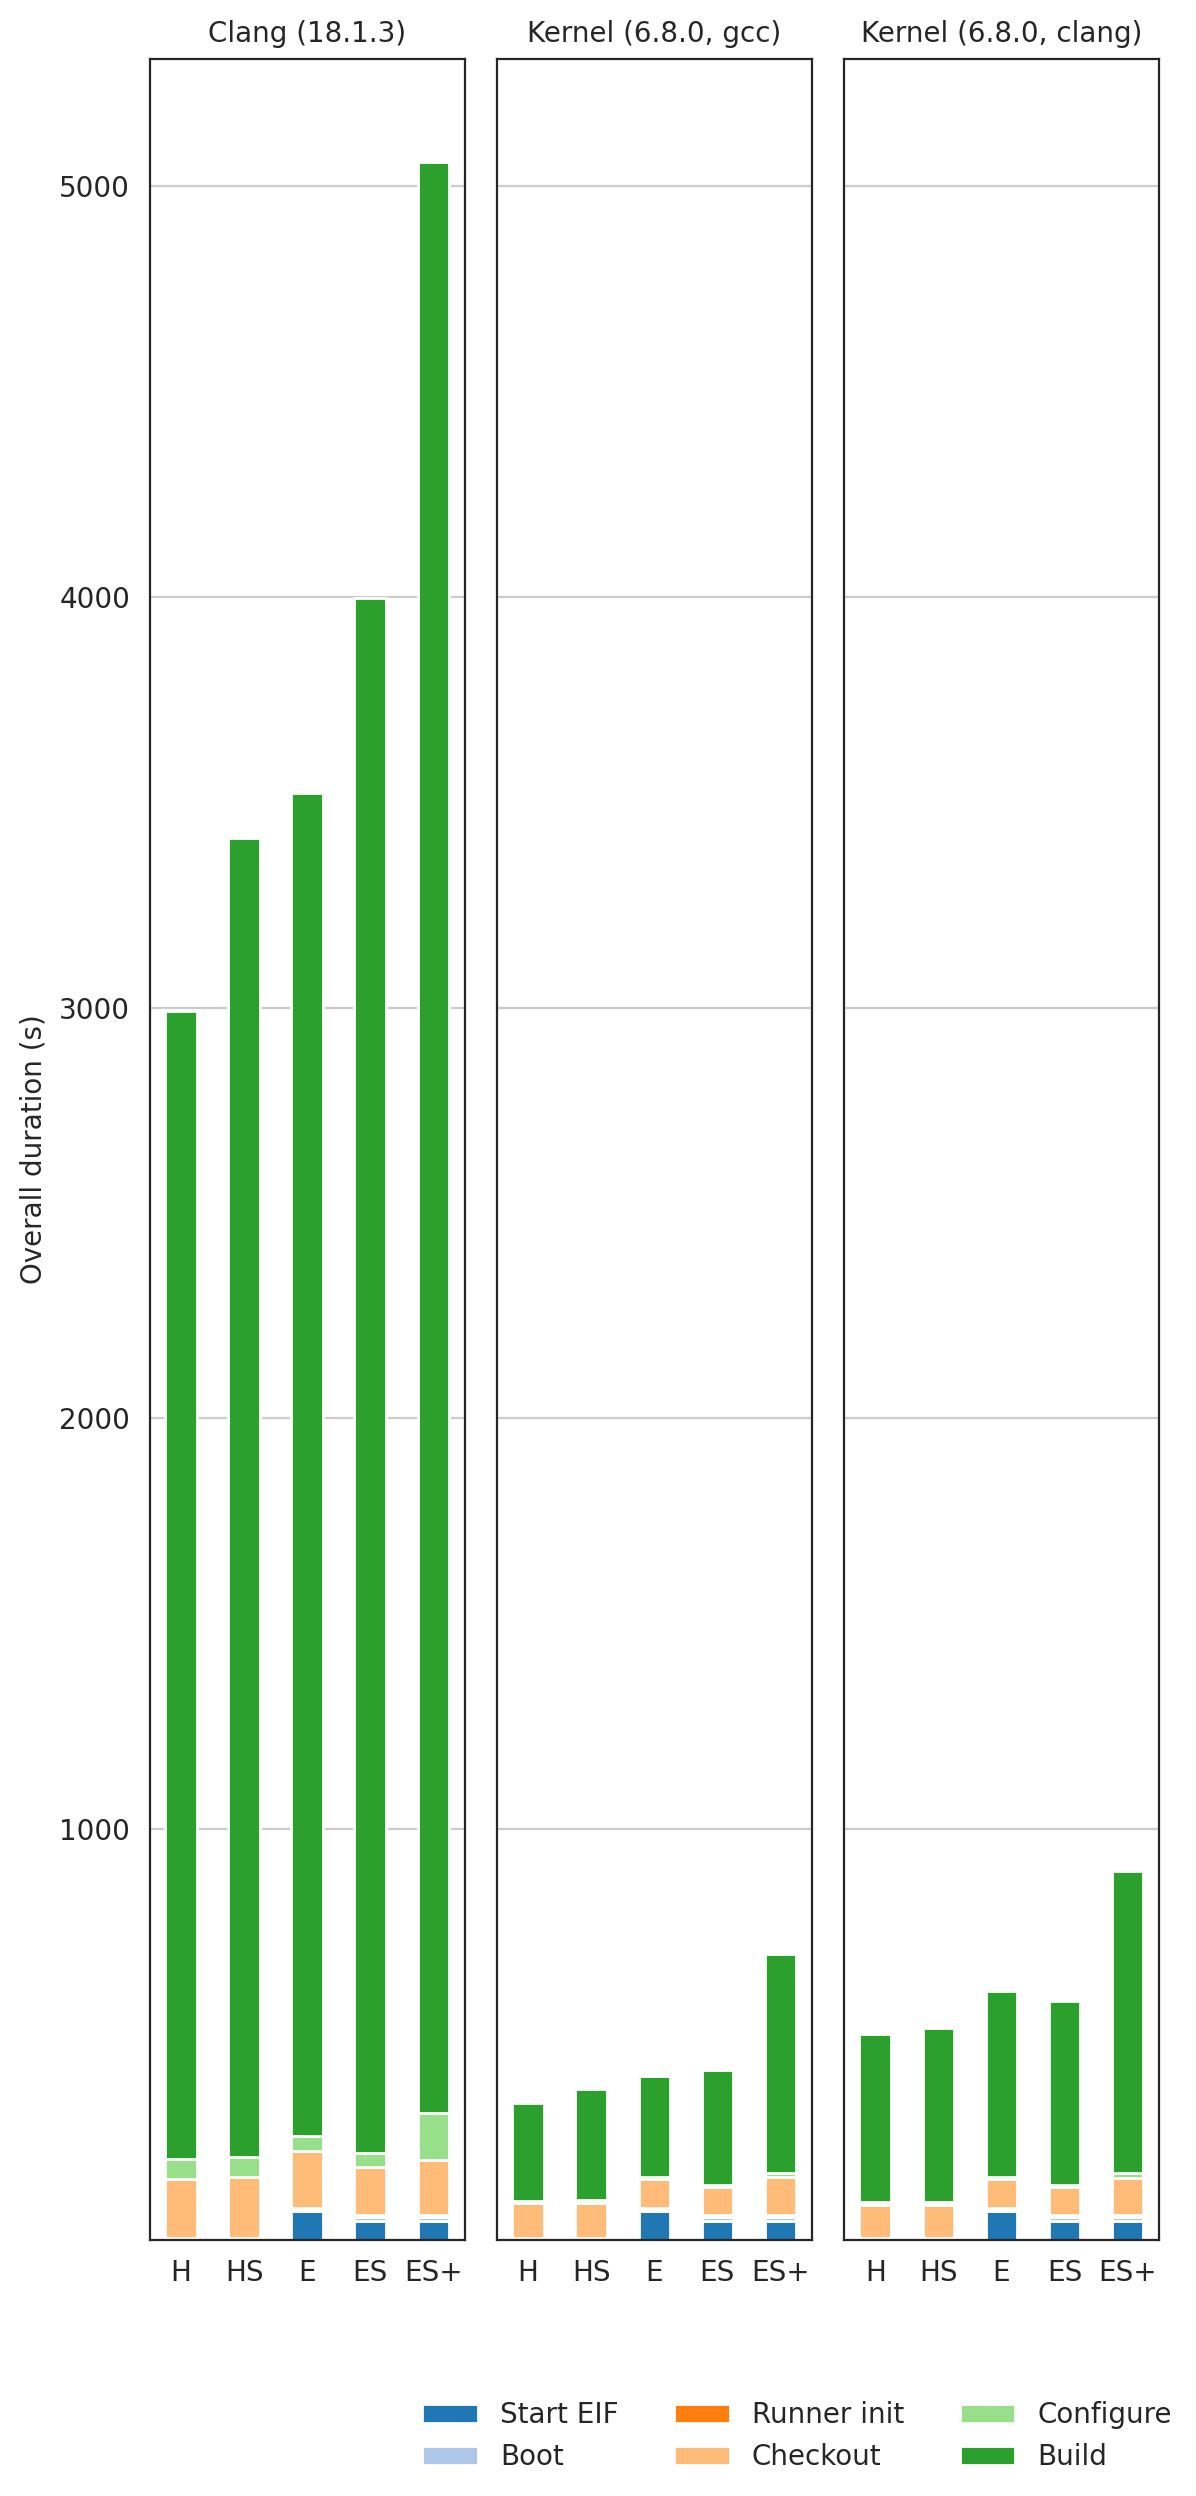

In [5]:
def plot_stacked_metrics(df, metrics, modes=MAIN_MODES, fig_size=FIG_SIZE_INCHES, bottom_adjust=0.25, ylim=None,
                         ln=None):
    targets = list(df.target_label.unique())

    fig, axs = plt.subplots(ncols=len(targets), sharey=True)
    fig.set_size_inches(fig_size)

    for target, ax in zip(targets, axs):
        df_target = df[(df['target_label'] == target) & (df['runner_start_mode_label'].isin(modes))].copy()
        df_grouped = df_target.groupby('runner_start_mode_label', observed=False)
        df_grouped = df_grouped[metrics].mean()
        df_grouped = df_grouped.reindex(modes)

        df_grouped.plot(kind='bar', stacked=True, ax=ax)

        # Set the colours of the stacked bars to green red white
        for i, bar in enumerate(ax.patches):
            duration = metrics[i // len(modes)]
            ax.patches[i].set_facecolor(DURATION_TO_COLOR[duration])

        ax.set_title(target, size=10)
        ax.set_ylabel('Overall duration (s)')
        ax.set_xlabel(None)
        ax.grid(axis='y')

        if ylim:
            ax.set_ylim(ylim)

        ax.get_legend().remove()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Replace handles and labels
    handles, _ = axs[0].get_legend_handles_labels()
    labels = [DURATIONS_TO_LABELS[l] for l in metrics]
    fig.legend(handles, labels, loc='lower right', ncol=ln if ln else len(metrics), frameon=False)

    fig.tight_layout()
    fig.subplots_adjust(bottom=bottom_adjust)
    return fig, axs


fig, _ = plot_stacked_metrics(
    df=df[(df.input_set == 'small') | (df.input_set == 'new')],
    metrics=['memory_allocation_duration', 'enclave_boot_duration', 'runner_config_duration', 'checkout_duration',
             'configure_duration', 'make_duration'],
    fig_size=(2 * FIG_SIZE_INCHES[0], FIG_SIZE_INCHES[1]),
    ylim=(0, 500)
)
show_and_save_figure(fig, 'stacked_start_boot_init_configure_make_main')

fig, _ = plot_stacked_metrics(
    df=df[(df.input_set == 'small') | (df.input_set == 'new')],
    metrics=['memory_allocation_duration', 'enclave_boot_duration', 'runner_config_duration', 'checkout_duration',
             'configure_duration', 'make_duration'],
    fig_size=(2 * FIG_SIZE_INCHES[0], 5 * FIG_SIZE_INCHES[1]),
    bottom_adjust=0.06,
    ylim=(0, 500)
)
show_and_save_figure(fig, 'stacked_start_boot_init_configure_make_main_tall')

# fig, _ = plot_stacked_metrics(df=df[df.input_set == 'small'], metrics=['configure_duration', 'make_duration'])
# show_and_save_figure(fig, 'stacked_configure_make_small')

fig, _ = plot_stacked_metrics(
    df=df[df.input_set == 'big'],
    metrics=['make_duration'],
    modes=ALL_MODES,
    fig_size=(FIG_SIZE_INCHES[0], 0.8 * FIG_SIZE_INCHES[1]),
)
show_and_save_figure(fig, 'stacked_configure_make_big')

fig, _ = plot_stacked_metrics(
    df=df[df.input_set == 'big'],
    metrics=['memory_allocation_duration', 'enclave_boot_duration', 'runner_config_duration', 'checkout_duration',
             'configure_duration', 'make_duration'],
    modes=ALL_MODES,
    fig_size=(FIG_SIZE_INCHES[0], 5 * FIG_SIZE_INCHES[1]),
    bottom_adjust=0.1,
    ln=3,
)
show_and_save_figure(fig, 'stacked_configure_make_big_tall')

# fig, _ = plot_stacked_metrics(df=df[df.input_set == 'new'], metrics=['configure_duration', 'make_duration'])
# show_and_save_figure(fig, 'stacked_configure_make_new')


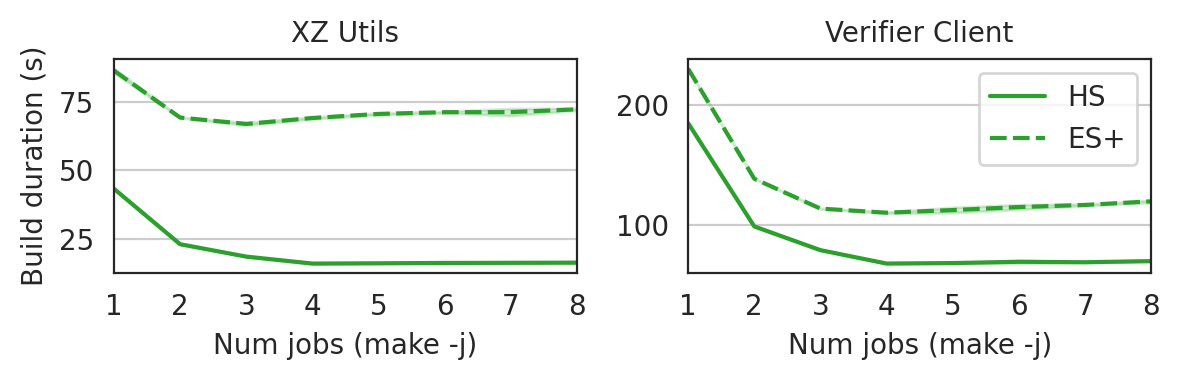

In [6]:
def create_scalar_plot(df, metric, modes=MAIN_MODES, fig_size=FIG_SIZE_INCHES):
    df = df[df['runner_start_mode_label'].isin(modes)].copy()

    df['target_base'] = df['target_label'].apply(lambda x: x.split(' (')[0])
    df['num_jobs'] = df['target_label'].apply(lambda x: x.split(' (j')[1].replace(')', '')).astype(int)
    targets = list(df.target_base.unique())

    fig, axs = plt.subplots(ncols=len(targets), sharey=False)
    fig.set_size_inches(fig_size)

    for target, ax in zip(targets, axs):
        df_target = df[df['target_base'] == target].copy()
        sns.lineplot(
            data=df_target,
            x='num_jobs',
            y=metric,
            # hue='target_base',
            style='runner_start_mode_label',
            color=DURATION_TO_COLOR[metric],
            errorbar='sd',
            ax=ax,
            legend=(ax == axs[-1])
        )
        ax.set_title(target, size=10)
        ax.set_xlim(1, 8)
        ax.set_xticks(range(1, 9))
        ax.set_ylabel('Build duration (s)' if target == targets[0] else None)
        ax.set_xlabel('Num jobs (make -j)')
        ax.grid(axis='y')

        if ax == axs[-1]:
            # Show legend, but remove title
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles=handles, labels=labels, title=None)

    fig.tight_layout()
    return fig, axs


fig, _ = create_scalar_plot(
    df=df[df.input_set == 'scalar'],
    metric='make_duration',
    modes=['ES+', 'HS'],
    fig_size=(FIG_SIZE_INCHES[0], 0.8 * FIG_SIZE_INCHES[1]),
)
show_and_save_figure(fig, 'scalar_jobs_build_duration')

In [7]:
# Print a large LaTeX table with the average data.
# Use the following structure
# - The rows are the targets, with sub rows for each mode
# - The columns are the metrics
# - The values are the average times (rounded to .1 seconds)
# - Only include the input_sets small, new, and big
# - The table should be in LaTeX format
# - The table should be in portrait mode and go accross two columns
# - Use booktabs and tabluarx

def table_str(d, label, caption):
    metrics = [
        'memory_allocation_duration',
        'enclave_boot_duration',
        'runner_config_duration',
        'checkout_duration',
        'configure_duration',
        'make_duration',
    ]
    modes = ['H', 'HS', 'E', 'ES', 'ES+']

    # Building table:
    table = []
    table.append("\\begin{table*}[h]")
    table.append("\\caption{" + caption + "}")
    table.append("\\centering \\footnotesize")
    table.append("\\begin{tabularx}{\\textwidth}{l l|" + "S[table-format=4.1] " * len(metrics) + "}")
    table.append("\\toprule")
    table.append("\\textbf{Target} & \\textbf{Mode} & " + " & ".join(
        f"\\text{{{DURATIONS_TO_LABELS[m]}}}" for m in metrics) + "\\\\")
    for target in d.target_label.unique():
        # Insert multirow cell for target
        table.append("\\midrule")
        table.append(f"\\multirow{{{len(modes)}}}{{*}}{{{target}}}")
        for mode in modes:
            # Get the average values
            avg_values = d[(d['target_label'] == target) & (d['runner_start_mode_label'] == mode)][metrics].mean()
            avg_values = [f"{v:.1f}" for v in avg_values]
            avg_values = [f"{v}\\si{{\\second}}" if v != "nan" else "n/a" for v in avg_values]
            # Join the values with &
            table.append(f" & {mode} & " + " & ".join(avg_values) + "\\\\")
    table.append("\\bottomrule")
    table.append("\\end{tabularx}")
    table.append("\\label{" + label + "}")
    table.append("\\end{table*}")
    return "\n".join(table)


t1 = table_str(
    d=df[(df['input_set'].isin(['small', 'new', 'big']))].copy(),
    label='tab:full-table:main',
    caption='Build times for all targets and modes. Missing items indicate that they did not work out-of-the-box, e.g. because Amazon Linux 2023 is missing some dependencies in H mode. All values in seconds and averaged over three iterations.'
)

scalar_d = df[(df['input_set'].isin(['scalar']))].copy()

# Sort by target_label (without any replacements)
scalar_d['target_label'] = scalar_d['target_label'].astype(str)
scalar_d = scalar_d.sort_values(by=['target_label', 'runner_start_mode_label'])

t2 = table_str(
    d=scalar_d[scalar_d.target_label.str.contains('XZ Utils')],
    label='tab:full-table:scalar-xz',
    caption='Build times for the C-based ``XZ Utils'' across all modes and job number combinations. All values in seconds and averaged over three iterations.'
)

t3 = table_str(
    d=scalar_d[scalar_d.target_label.str.contains('Verifier Client')],
    label='tab:full-table:scalar-vc',
    caption='Build times for the Rust-based ``Verifier Client'' across all modes and job number combinations. All values in seconds and averaged over three iterations.'
)

print(t1)
print(t2)
print(t3)

\begin{table*}[h]
\caption{Build times for all targets and modes. Missing items indicate that they did not work out-of-the-box, e.g. because Amazon Linux 2023 is missing some dependencies in H mode. All values in seconds and averaged over three iterations.}
\centering \footnotesize
\begin{tabularx}{\textwidth}{l l|S[table-format=4.1] S[table-format=4.1] S[table-format=4.1] S[table-format=4.1] S[table-format=4.1] S[table-format=4.1] }
\toprule
\textbf{Target} & \textbf{Mode} & \text{Start EIF} & \text{Boot} & \text{Runner init} & \text{Checkout} & \text{Configure} & \text{Build}\\
\midrule
\multirow{5}{*}{Clang (18.1.3)}
 & H & 0.0\si{\second} & 0.1\si{\second} & 3.7\si{\second} & 145.0\si{\second} & 48.4\si{\second} & 2793.7\si{\second}\\
 & HS & 0.0\si{\second} & 0.1\si{\second} & 4.2\si{\second} & 148.0\si{\second} & 48.5\si{\second} & 3211.3\si{\second}\\
 & E & 71.0\si{\second} & 3.1\si{\second} & 4.1\si{\second} & 137.2\si{\second} & 36.7\si{\second} & 3270.9\si{\second}\\
 & ES &

In [8]:
# Individual metrics for the text

def avg_start_time_small_targets(df):
    d = df[(df['input_set'].isin(['small']))].copy()
    d = d[d['runner_start_mode_label'].isin(['ES', 'ESP'])]
    m = d['memory_allocation_duration'].mean() + d['enclave_boot_duration'].mean()
    return m


def avg_checkout_and_runner_init_small_targets(df):
    d = df[(df['input_set'].isin(['small']))].copy()
    d = d[d['runner_start_mode_label'].isin(['ES', 'ESP'])]
    m = d['checkout_duration'].mean() + d['enclave_boot_duration'].mean()
    return m


def print_checkout_durations_for_clang(df):
    d = df.copy()
    d = d[d['target_label'] == 'Clang (18.1.3)']
    for mode in ALL_MODES:
        x = d[d['runner_start_mode_label'] == mode]
        print(f"Clang checkout_duration mean {mode=}: {x['checkout_duration'].mean():.1f} ")


def print_build_durations_for_neovim(df):
    d = df.copy()
    d = d[d['target_label'].str.contains('NeoVIM')]
    baseline = d[d['runner_start_mode_label'] == 'HS']['make_duration'].mean()
    for mode in ALL_MODES:
        x = d[d['runner_start_mode_label'] == mode]
        percent_over_baseline = (x['make_duration'].mean() - baseline) / baseline * 100
        print(f"NeoVIM build_duration mean {mode=}: {x['make_duration'].mean():.1f} {percent_over_baseline:+.0f}%")

def print_build_durations_for_target(df, target_label):
    d = df.copy()
    d = d[d['target_label'].str.contains(target_label)]
    baseline = d[d['runner_start_mode_label'] == 'HS']['make_duration'].mean()
    for mode in ALL_MODES:
        x = d[d['runner_start_mode_label'] == mode]
        percent_over_baseline = (x['make_duration'].mean() - baseline) / baseline * 100
        print(f"{target_label} build_duration mean {mode=}: {x['make_duration'].mean():.1f}s {x['make_duration'].mean()/60.0:.0f}m {percent_over_baseline:+.0f}%")

def print_all_build_durations_over_baseline(df):
    sum_e2e_durations = {'HS': 0.0, 'ES': 0.0, 'ES+': 0.0}
    sum_startup_durations = {'HS': 0.0, 'ES': 0.0, 'ES+': 0.0}
    cnt = 0
    for target_label in df.target_label.unique():
        if ' (j' in target_label: continue  # exclude scaler repetitions
        cnt += 1
        d = df.copy()
        d = d[d['target_label'] == target_label]
        for mode in ['HS', 'ES', 'ES+']:
            x = d[d['runner_start_mode_label'] == mode]
            sum_startup_durations[mode] += x['memory_allocation_duration'].mean() + x['enclave_boot_duration'].mean()
            sum_e2e_durations[mode] += x['e2e_duration'].mean() - x['memory_allocation_duration'].mean() + x['enclave_boot_duration'].mean()

    def print_duration_in_h_m(seconds):
        seconds += 30 # round to nearest minute
        hours = seconds // 3600
        minutes = (seconds % 3600) // 60
        return f"{int(hours)}h{int(minutes)}m"

    baseline = 0
    percentage_over_baseline = 0.0
    for mode in ['HS', 'ES', 'ES+']:
        if baseline:
            percentage_over_baseline = (sum_e2e_durations[mode] - baseline) / baseline * 100
        print(f"Overall duration mean {mode=}: {print_duration_in_h_m(sum_e2e_durations[mode])} {percentage_over_baseline:+.0f}%")
        if mode == 'HS':
            baseline = sum_e2e_durations[mode]

    # print startup duration for the enclave variants
    for mode in ['ES', 'ES+']:
        print(f"Startup duration mean {mode=}: {sum_startup_durations[mode] / cnt:.1f} ")


print(f"{avg_start_time_small_targets(df)=:.1f}")
print("---")
print(f"{avg_checkout_and_runner_init_small_targets(df)=:.1f}")
print("---")
print_checkout_durations_for_clang(df)
print("---")
print_build_durations_for_neovim(df)
print("---")
print_build_durations_for_target(df, 'Clang')
print("---")
print_build_durations_for_target(df, 'Kernel.*gcc')
print("---")
print_all_build_durations_over_baseline(df)

avg_start_time_small_targets(df)=37.6
---
avg_checkout_and_runner_init_small_targets(df)=8.8
---
Clang checkout_duration mean mode='H': 145.0 
Clang checkout_duration mean mode='HS': 148.0 
Clang checkout_duration mean mode='E': 137.2 
Clang checkout_duration mean mode='ES': 117.2 
Clang checkout_duration mean mode='ES+': 132.8 
---
NeoVIM build_duration mean mode='H': 255.9 +38%
NeoVIM build_duration mean mode='HS': 184.9 +0%
NeoVIM build_duration mean mode='E': 158.9 -14%
NeoVIM build_duration mean mode='ES': 167.3 -10%
NeoVIM build_duration mean mode='ES+': 311.7 +69%
---
Clang build_duration mean mode='H': 2793.7s 47m -13%
Clang build_duration mean mode='HS': 3211.3s 54m +0%
Clang build_duration mean mode='E': 3270.9s 55m +2%
Clang build_duration mean mode='ES': 3784.1s 63m +18%
Clang build_duration mean mode='ES+': 4748.5s 79m +48%
---
Kernel.*gcc build_duration mean mode='H': 238.2s 4m -13%
Kernel.*gcc build_duration mean mode='HS': 272.6s 5m +0%
Kernel.*gcc build_duration mean m